In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date_find = session.query(Measurement.date).order_by(Measurement.id.desc()).first()
for x in date_find:
    recent_date = x
    print(f"the most recent date in the data set is {recent_date}")

the most recent date in the data set is 2017-08-23


<AxesSubplot:xlabel='date'>

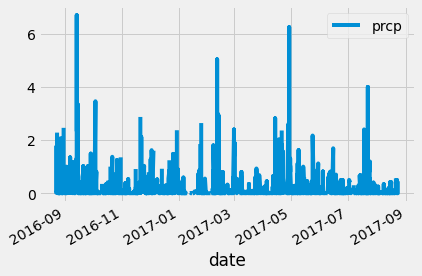

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
conn = engine.connect()

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

##querying the id,date,percipitation data from the measurement table,
##converting the date column to datetime, making it into dataframe
data = pd.read_sql("SELECT id,date,prcp FROM measurement", conn)
data['date'] = pd.to_datetime(data['date'])
data_info_df = pd.DataFrame(data)

##breaking up the date and adding year month and date columns
##calculating the date for 1 year ago and making it a variable to call
data_info_df['year'] = data_info_df['date'].dt.year
data_info_df['month'] = data_info_df['date'].dt.month
data_info_df['day'] = data_info_df['date'].dt.day
find_date = data_info_df.loc[data_info_df['date'] == recent_date]
last_year = find_date['year'].max()
last_yr_yr = last_year - 1
last_yr_mon = find_date['month'].max()
last_yr_day = find_date['day'].max()
last_yr_date = (f"{last_yr_yr}-{last_yr_mon}-{last_yr_day}")

##finding all the info in the date range requested, and transforming the dataframe to match whats requested
date_range = data_info_df[(data_info_df['date'] >= last_yr_date) & (data_info_df['date'] <= recent_date)]
date_range_ndd = date_range[['date','prcp']]
final_date = date_range_ndd.set_index('date')
final_date.head(50)


# Use Pandas Plotting with Matplotlib to plot the data

final_date.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_date.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_cnt = pd.read_sql("SELECT COUNT(name) FROM station", conn)
station_cnt

,COUNT(name)
0,9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = pd.read_sql("SELECT station,COUNT(station) \
                                FROM measurement GROUP BY station ORDER BY COUNT(station) DESC", conn)
station_activity

,station,COUNT(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
#print the most active station
most_activity = station_activity['station']
for k in most_activity:
    most_active_id = k
    break

print(f"The most active station id is: {most_active_id}")

The most active station id is: USC00519281


In [15]:
# Using the most active station id from the previous query,
#calculate the lowest, highest, and average temperature.
#calculate the lowest temperature
id_min_temp = pd.read_sql("SELECT MIN(tobs) FROM measurement WHERE station = 'USC00519281'", conn)
min_temp = id_min_temp['MIN(tobs)']
for a in min_temp:
    min_tob = a
    break
#calculate the highest temperature
id_max_temp = pd.read_sql("SELECT MAX(tobs) FROM measurement WHERE station = 'USC00519281'", conn)
max_temp = id_max_temp['MAX(tobs)']
for b in max_temp:
    max_tob = b
    break
#calculate the average temperature
id_avg_temp = pd.read_sql("SELECT AVG(tobs) FROM measurement WHERE station = 'USC00519281'", conn)
avg_temp = id_avg_temp['AVG(tobs)']
for c in avg_temp:
    avg_tob = c
    break
#print findings
print(f" The lowest temperature from station {most_active_id} is: {min_tob}")
print(f" The highest temperature from station {most_active_id} is: {max_tob}")
print(f" The average temperature from station {most_active_id} is: {avg_tob}")

 The lowest temperature from station USC00519281 is: 54.0
 The highest temperature from station USC00519281 is: 85.0
 The average temperature from station USC00519281 is: 71.66378066378067


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
##Querying the last 12 months of temperature observation data for this station
last_12_mon = pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281'", conn)

##query the same data but descending for the for loop
last_12_mon_desc = pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281' ORDER BY date DESC", conn)
last_12_date = last_12_mon_desc['date']

##find the most recent date
for s in last_12_date:
    most_recent_date = s
    break
    
##converting the date column to datetime
##breaking up the date and adding year month and date columns
last_12_mon['date'] = pd.to_datetime(last_12_mon['date'])
last_12_mon_df = last_12_mon[['station','date','tobs']]
last_12_mon_df['year'] = last_12_mon_df['date'].dt.year
last_12_mon_df['month'] = last_12_mon_df['date'].dt.month
last_12_mon_df['day'] = last_12_mon_df['date'].dt.day
last_12_mon_df

##calculating the date for 1 year ago and making it a variable to call
find_12mon_date = last_12_mon_df.loc[last_12_mon_df['date'] == most_recent_date]
yr_ago = find_12mon_date['year'].max()
yr_ago_yr = yr_ago - 1
yr_ago_mon = find_12mon_date['month'].max()
yr_ago_day = find_12mon_date['day'].max()
yr_ago_date = (f"{yr_ago_yr}-{yr_ago_mon}-{yr_ago_day}")

##finding the needed data and columns
last_12 = last_12_mon_df[(last_12_mon_df['date'] >= yr_ago_date) & (data_info_df['date'] <= most_recent_date)]
last_12_ndd = last_12[['station','tobs']]
last_12_ndd

<ipython-input-16-76da09e849dc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_12_mon_df['year'] = last_12_mon_df['date'].dt.year
<ipython-input-16-76da09e849dc>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_12 = last_12_mon_df[(last_12_mon_df['date'] >= yr_ago_date) & (data_info_df['date'] <= most_recent_date)]


,station,tobs
2415,USC00519281,80.0
2416,USC00519281,79.0
2417,USC00519281,81.0
2418,USC00519281,79.0
2419,USC00519281,78.0
...,...,...
2767,USC00519281,77.0
2768,USC00519281,77.0
2769,USC00519281,76.0
2770,USC00519281,76.0


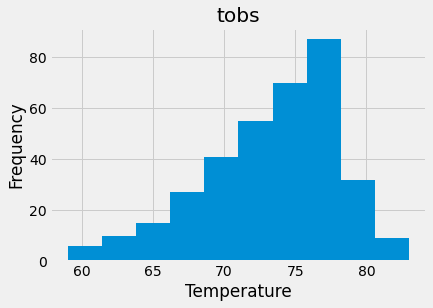

In [17]:
#plotting the last 12 months of temperature observation data for this station as a histogram
last_12_ndd.hist()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [18]:
# Close Session
session.close()